In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt
import time
import datetime
import seaborn as sns



EV_PV_homes = pd.read_csv('C:/Users/Caleb/Desktop/Poolla Lab/Data/15min_EV_PV_homes_only.csv')


In [4]:
#change the time data in the df to timestamps instead of strings
working_df=EV_PV_homes[["dataid","state","local_15min","grid","car1","solar"]]
zz=pd.to_datetime((working_df["local_15min"]+"00"),format="%Y-%m-%d %H:%M:%S%z",errors="coerce")
working_df=working_df.assign(local_15min=zz)

working_df.head(3)



,dataid,state,local_15min,grid,car1,solar
0,5679,NY,2019-06-24 14:45:00-05:00,0.016,0.002,1.838
1,5679,NY,2019-06-24 14:30:00-05:00,-0.440,0.001,2.102
2,5679,NY,2019-06-24 14:15:00-05:00,-0.302,0.002,2.193


In [5]:
# format='%Y%m%d'
# pd.to_datetime(working_df.loc["state"=="NY",:].loc[working_df[0,"local_15min"])
# pd.to_datetime("2019-06-24 14:45:00")

#lets pick a home to look at for this plot
#grab the home with the highest PV generation for now

top_solar=working_df.groupby("dataid").agg(sum).sort_values(by="solar",ascending=False).head(1)
top_solar_dataid=top_solar.index.values[0]

#so lets look at home with dataid=27


In [6]:
one_home=working_df.loc[working_df["dataid"]==top_solar_dataid,:]
one_home

,dataid,state,local_15min,grid,car1,solar
12,27,NY,2019-06-29 14:45:00-05:00,-4.386,0.003,4.895
13,27,NY,2019-06-29 14:30:00-05:00,-3.609,0.003,4.163
14,27,NY,2019-06-29 14:15:00-05:00,-7.870,0.003,8.433
15,27,NY,2019-06-29 14:00:00-05:00,-2.431,0.003,3.083
24,27,NY,2019-06-24 14:45:00-05:00,-0.699,3.380,4.565
...,...,...,...,...,...,...
70634,27,NY,2019-10-31 22:00:00-05:00,4.417,3.372,-0.001
70639,27,NY,2019-10-31 23:45:00-05:00,0.736,0.003,-0.003
70640,27,NY,2019-10-31 23:30:00-05:00,0.548,0.003,-0.003
70641,27,NY,2019-10-31 23:15:00-05:00,2.591,1.969,-0.002


C:\Users\Caleb\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  self.obj[key] = _infer_fill_value(value)
C:\Users\Caleb\Anaconda3\lib\site-packages\seaborn\relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)
C:\Users\Caleb\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\conver

Text(0.5, 1.0, 'Consumption Vs Time For One Home Over One Day')

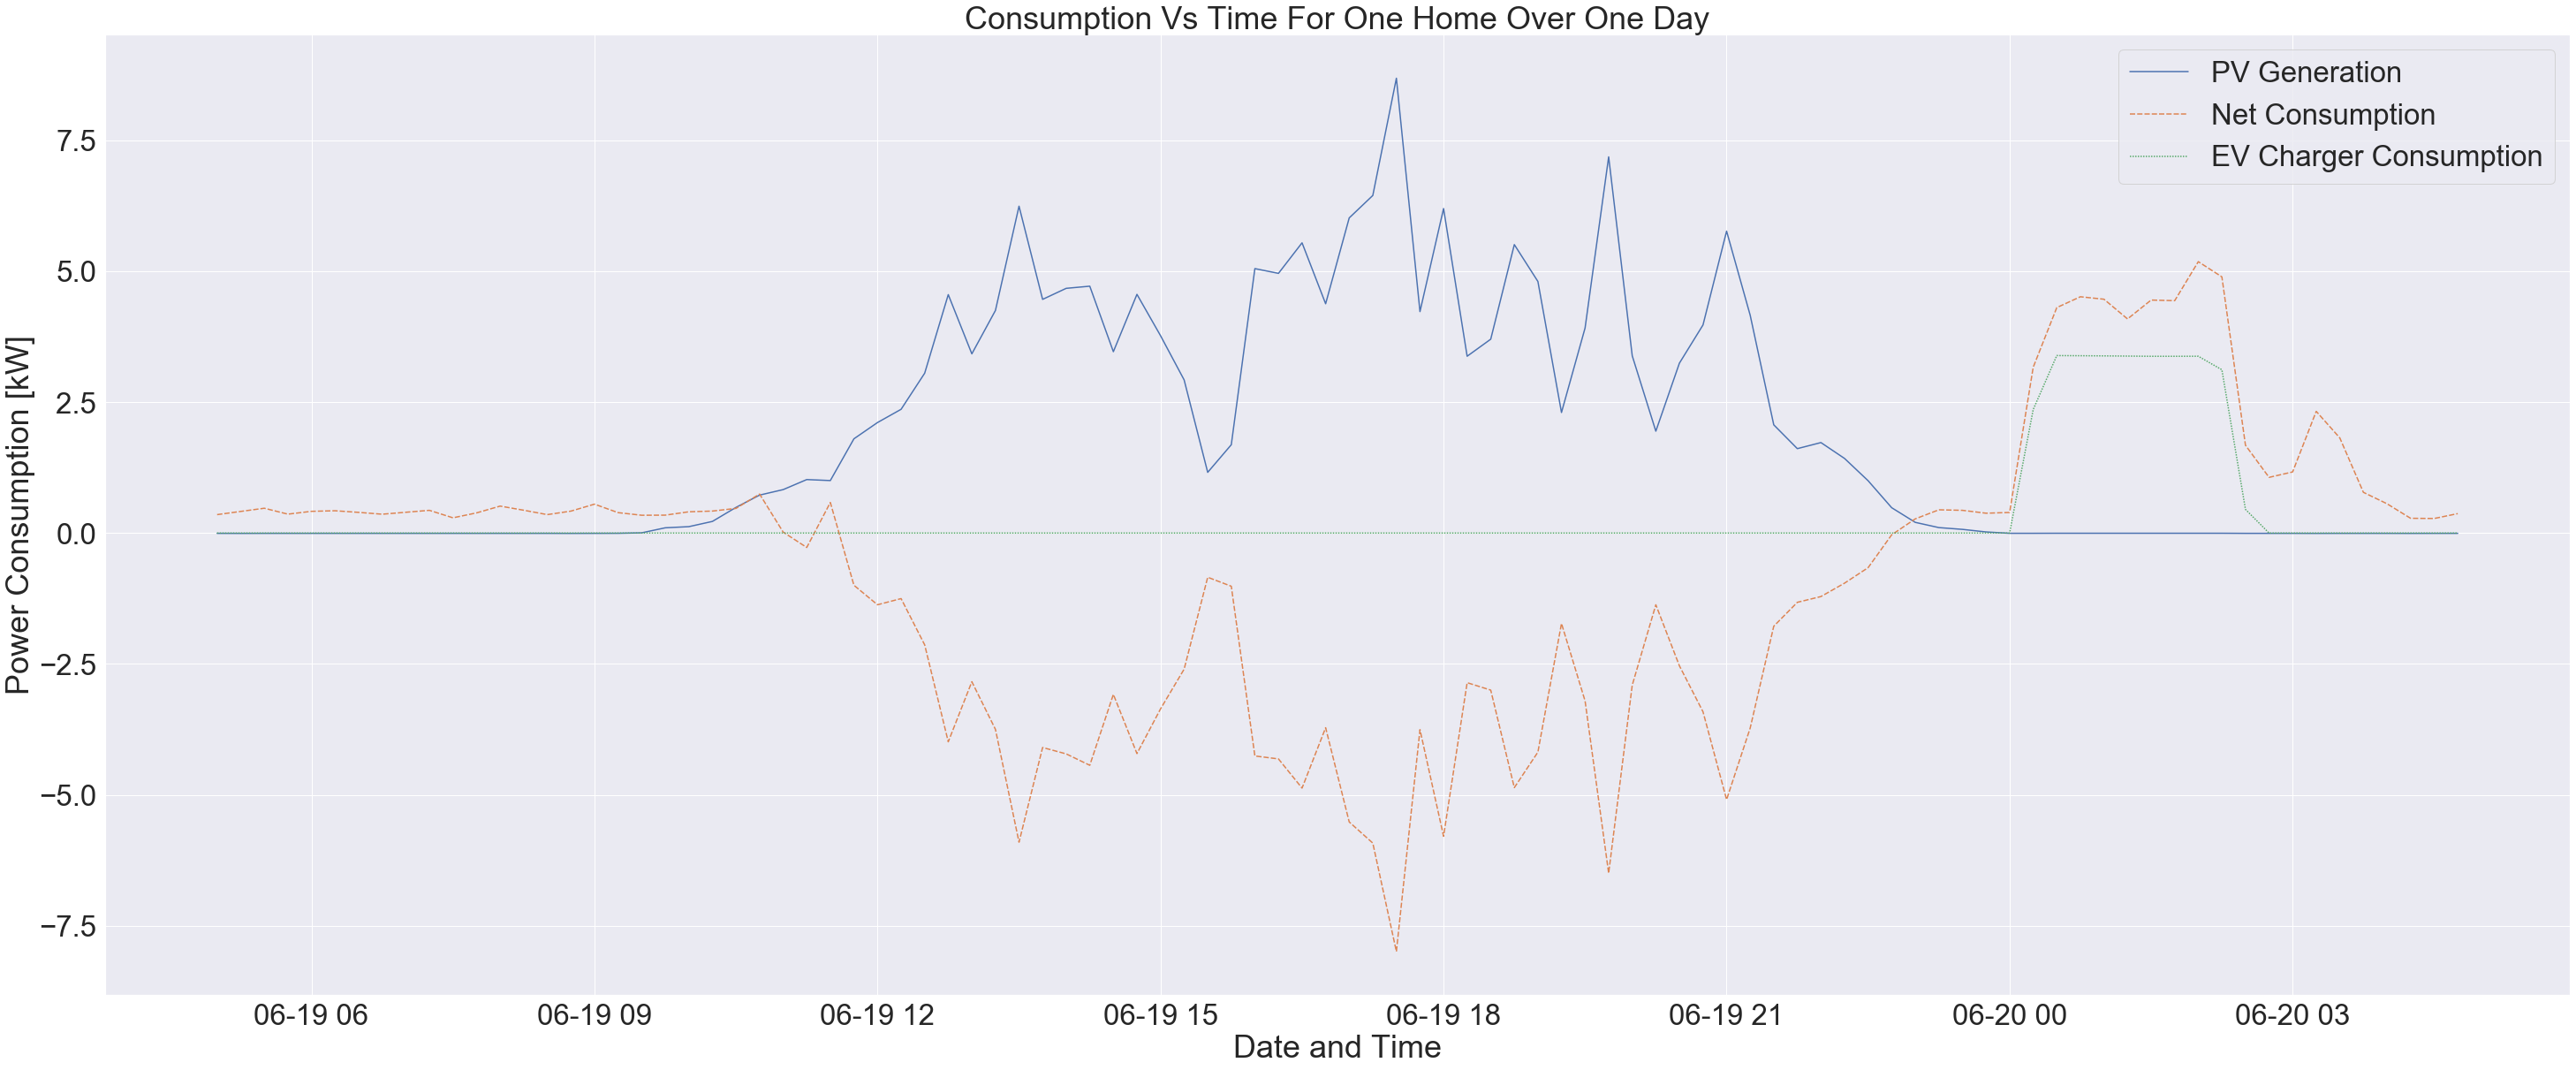

In [7]:
#shift the index to a timeseries
# sns.set(style="darkgrid")
sns.set(font_scale=3)
plt.figure(figsize=(50,20))
one_home_df=one_home.rename(columns={"local_15min":"time"}).set_index("time")
# index_x=pd.DatetimeIndex(one_home[["local_15min"]])

ax1 = sns.lineplot(data=one_home_df.loc["06/19/2019":"06/19/2019",["solar","grid","car1"]].rename(columns={"solar":"PV Generation","grid":"Net Consumption","car1":"EV Charger Consumption"}))
one_home_df.head(5)

# ax1.set(ax1.lines,linewidth=10)

ax1.set_xlabel("Date and Time")
ax1.set_ylabel("Power Consumption [kW]")
ax1.set_title("Consumption Vs Time For One Home Over One Day")



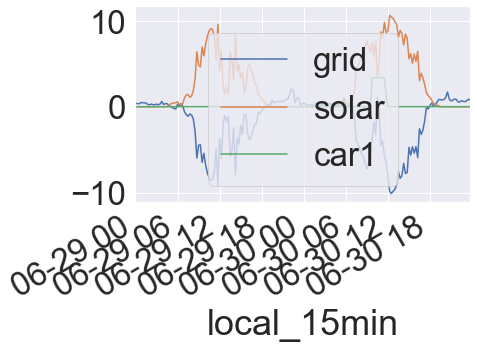

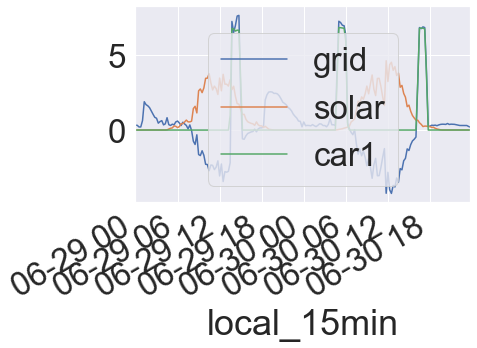

In [8]:
#lets make a function that plots all the values we want for a specific period of time

# timeseries_indexed_df=working_df.rename(columns={"local_15min":"time"}).set_index("time")
# print(type(timeseries_indexed_df.index.values[0]))

# datetime.strptime(date_string, format)
dataids_ex=[27,5679]
def plot_house_info(df,dataids,start_date,end_date):
  #######dataids is a list, start_date and end_date are strings (ex:'2019-06-29' or '2019-06' to just specifiy a month)

  # fig, axs=mp.subplots(1,len(dataids),figsize = (50,20))
  # fig.subplots_adjust(hspace=0.2, wspace=0.1)
  ii=0

  for home in dataids:

    home_df=df.loc[df["dataid"]==home,:].set_index("local_15min")
    home_df.loc[start_date:end_date,["grid","solar","car1"]].plot()

    ii+=1


plot_house_info(working_df,dataids_ex,"2019-06-29","2019-06-30")



In [9]:
print(working_df.loc[:,"local_15min"].max())
print(working_df.loc[:,"local_15min"].min())

2019-10-31 23:45:00-05:00
2018-01-01 00:00:00-06:00
